In [1]:
import os
current = os.getcwd()
print('현재경로:', current)

new = 'd:/study/python/project'
os.chdir(new)
print('변경경로:', new)

현재경로: d:\study\python\project\면적당 매매가
변경경로: d:/study/python/project


In [3]:
import pandas as pd
import numpy as np

rd = pd.read_csv('rawdata.csv', encoding='cp949')

rd.head()

C:\Users\human\AppData\Local\Temp\ipykernel_588\390487603.py:4: DtypeWarning: Columns (7,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  rd = pd.read_csv('rawdata.csv', encoding='cp949')


,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11500,강서구,10900,방화동,1,대지,614,11,원미,...,58000,63.060,0.0,4,NaN,NaN,1988.0,아파트,중개거래,경북 경산시
1,2024,11440,마포구,11000,노고산동,1,대지,107,36,현대벤처빌,...,22000,27.900,0.0,16,NaN,NaN,2002.0,아파트,중개거래,서울 마포구
2,2024,11350,노원구,10300,공릉동,1,대지,743,0,공릉동한보에센시티아파트,...,51500,59.400,0.0,10,NaN,NaN,2000.0,아파트,중개거래,서울 노원구
3,2024,11530,구로구,10200,구로동,1,대지,103,6,구로오네뜨시티,...,15000,16.710,0.0,13,NaN,NaN,2022.0,아파트,직거래,NaN
4,2024,11110,종로구,17500,숭인동,1,대지,766,0,종로청계힐스테이트,...,105000,84.947,0.0,18,NaN,20240514.0,2009.0,아파트,중개거래,서울 종로구


In [11]:
rd_per_area = round(rd.groupby(['자치구명'])['물건금액(만원)'].sum() / rd.groupby(['자치구명'])['건물면적(㎡)'].sum(), 2)

print(rd_per_area)

자치구명
강남구     1892.66
강동구     1017.21
강북구      666.46
강서구      843.17
관악구      745.16
광진구     1079.21
구로구      704.28
금천구      638.30
노원구      720.75
도봉구      600.05
동대문구     832.93
동작구     1028.33
마포구     1168.31
서대문구     895.68
서초구     1679.36
성동구     1238.03
성북구      780.61
송파구     1383.28
양천구     1012.00
영등포구    1034.08
용산구     1439.60
은평구      760.53
종로구      975.07
중구      1000.05
중랑구      663.49
dtype: float64


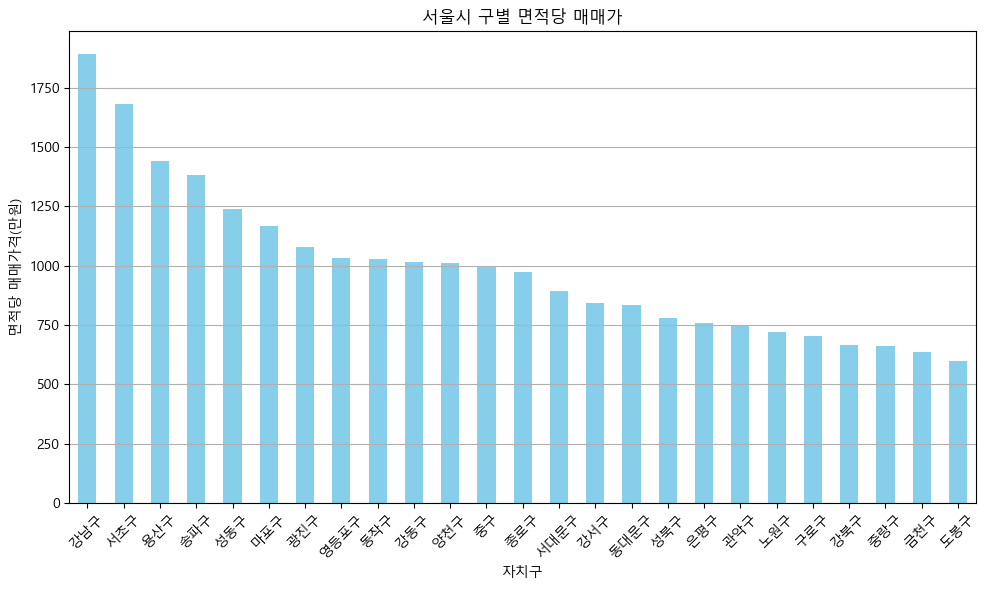

In [17]:
import matplotlib.pyplot as plt

# 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

#가격 순으로 정렬
rd_per_area_sorted = rd_per_area.sort_values(ascending=False)

# 그래프 그리기
plt.figure(figsize=(10, 6))
rd_per_area_sorted.plot(kind='bar', color='skyblue')
plt.title('서울시 구별 면적당 매매가')
plt.xlabel('자치구')
plt.ylabel('면적당 매매가격(만원)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# 그래프 보여주기
plt.show()